## Importing dataset

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from wordcloud import WordCloud

In [57]:
df = pd.read_csv('/content/drive/MyDrive/Data/fake_news_classifier/train.csv')
print(df.shape)
# df = df.loc[0:200]

(20800, 5)


In [59]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [60]:
# from google.colab import drive
# drive.mount('/content/drive')

### Checking for null values

In [61]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [62]:
len(df['author'].unique())

4202

In [63]:
df.drop(['id','author'], axis=1, inplace=True)

In [64]:
df.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


1 - fake news <br>
0 - real news

In [65]:
df['title'].loc[0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [66]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [67]:
df.isnull().sum()

index    0
title    0
text     0
label    0
dtype: int64

In [68]:
df.shape

(20203, 4)

In [69]:
df['label'].value_counts()

0    10387
1     9816
Name: label, dtype: int64

In [70]:
df['merged'] = df['title'] + df['text']

In [71]:
df.head()

,index,title,text,label,merged
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You FiredWhy the Truth...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


## Text preprocessing

In [72]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
def processing(sent):
  review = re.sub('[^a-zA-Z0-9]',' ',sent)
  review = review.lower()
  review = review.split()

  words = []
  ps = PorterStemmer()

  for word in review:
    if word not in stopwords.words('english'):
      word = ps.stem(word)
      words.append(word)

  sent = ' '.join(words)
  return sent

In [74]:
df['title'] = df['title'].apply(processing)

In [77]:
for index in tqdm(range(len(df['text']))):
    df.loc[index, 'text'] = processing(df.loc[index, 'text'])

100%|██████████| 20203/20203 [32:22<00:00, 10.40it/s]


In [78]:
for index in tqdm(range(len(df['merged']))):
    df.loc[index, 'merged'] = processing(df.loc[index, 'merged'])

100%|██████████| 20203/20203 [31:52<00:00, 10.56it/s]


In [79]:
df.head()

,index,title,text,label,merged
0,0,hous dem aid even see comey letter jason chaff...,hous dem aid even see comey letter jason chaff...,1,hous dem aid even see comey letter jason chaff...
1,1,flynn hillari clinton big woman campu breitbart,ever get feel life circl roundabout rather hea...,0,flynn hillari clinton big woman campu breitbar...
2,2,truth might get fire,truth might get fire octob 29 2016 tension int...,1,truth might get firedwhi truth might get fire ...
3,3,15 civilian kill singl us airstrik identifi,video 15 civilian kill singl us airstrik ident...,1,15 civilian kill singl us airstrik identifiedv...
4,4,iranian woman jail fiction unpublish stori wom...,print iranian woman sentenc six year prison ir...,1,iranian woman jail fiction unpublish stori wom...


Title length

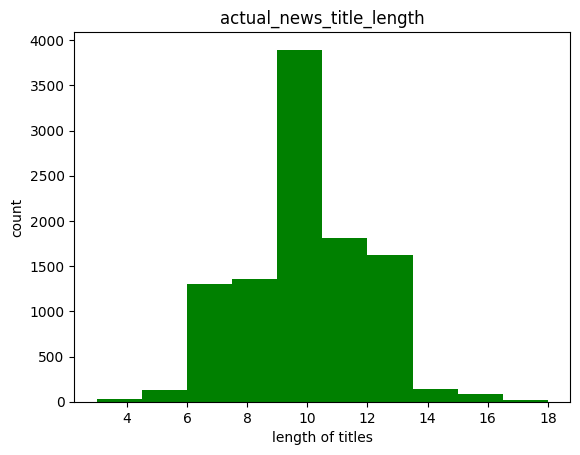

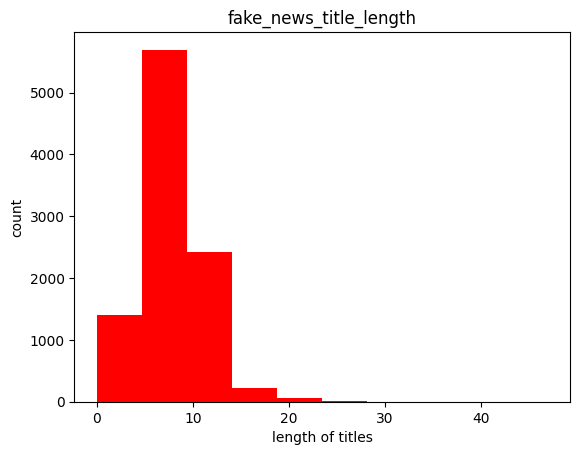

In [80]:
length_of_titles_real_news = [len(title.split()) for title in df['title'][df['label']==0]]
length_of_titles_fake_news = [len(title.split()) for title in df['title'][df['label']==1]]

plt.hist(length_of_titles_real_news, color='green')
plt.title('actual_news_title_length')
plt.xlabel('length of titles')
plt.ylabel('count')
plt.show()

plt.hist(length_of_titles_fake_news, color='red')
plt.title('fake_news_title_length')
plt.xlabel('length of titles')
plt.ylabel('count')
plt.show()

Text length

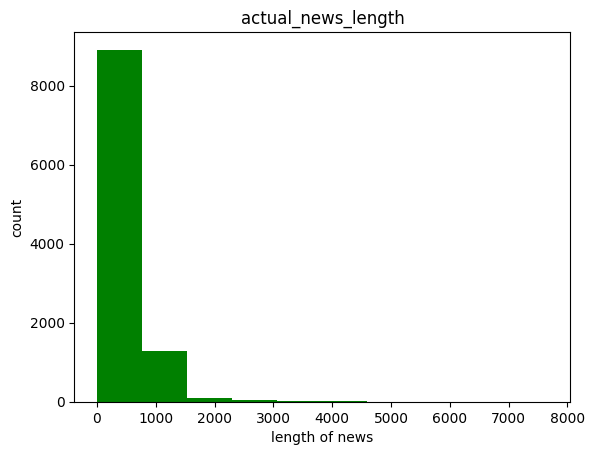

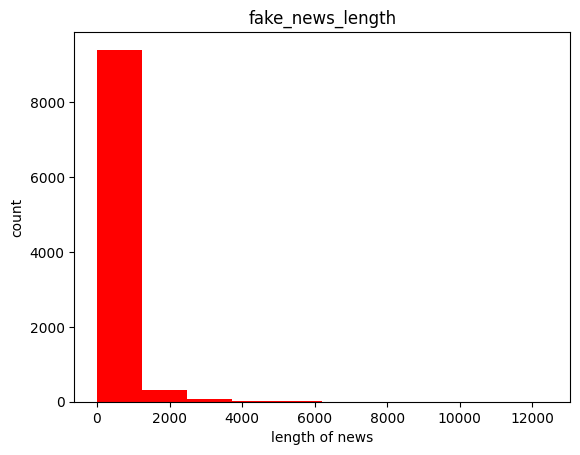

In [81]:
length_of_real_news = [len(txt.split()) for txt in df['text'][df['label']==0]]
length_of_fake_news = [len(txt.split()) for txt in df['text'][df['label']==1]]

plt.hist(length_of_real_news, color='green')
plt.title('actual_news_length')
plt.xlabel('length of news')
plt.ylabel('count')
plt.show()

plt.hist(length_of_fake_news, color='red')
plt.title('fake_news_length')
plt.xlabel('length of news')
plt.ylabel('count')
plt.show()

Combined

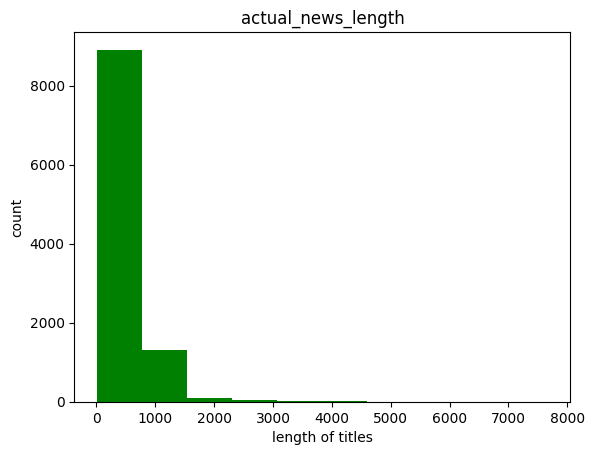

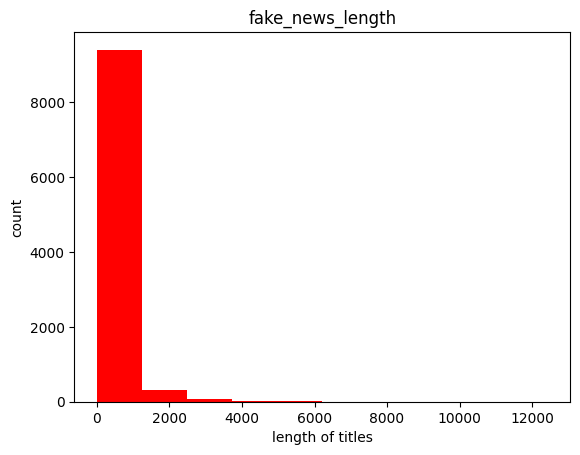

In [82]:
length_of_text_and_titles_real_news = [len(txt.split()) for txt in df['merged'][df['label']==0]]
length_of_text_and_titles_fake_news = [len(txt.split()) for txt in df['merged'][df['label']==1]]

plt.hist(length_of_text_and_titles_real_news, color='green')
plt.title('actual_news_length')
plt.xlabel('length of titles')
plt.ylabel('count')
plt.show()

plt.hist(length_of_text_and_titles_fake_news, color='red')
plt.title('fake_news_length')
plt.xlabel('length of titles')
plt.ylabel('count')
plt.show()

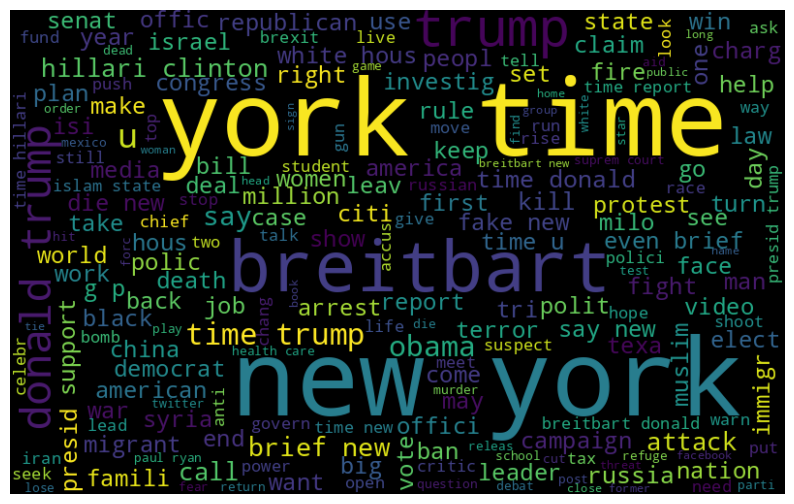

In [83]:
# real title cloud
real_titles =' '.join([text for text in df['title'][df['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_titles)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

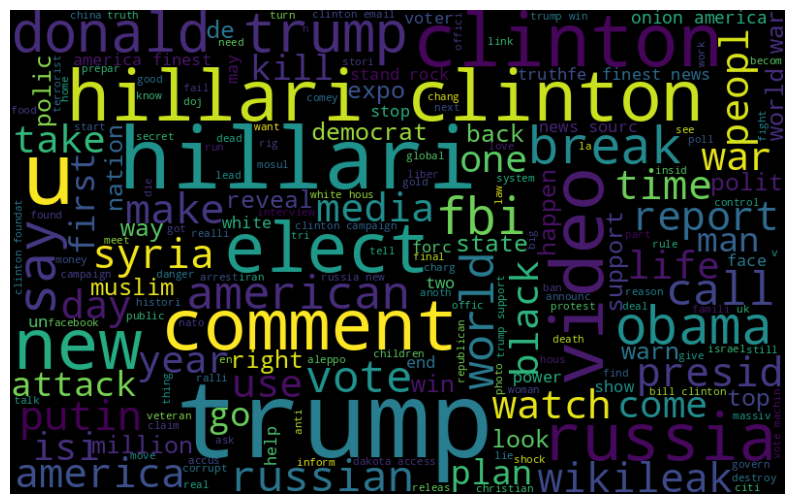

In [84]:
# fake title cloud
fake_titles =' '.join([text for text in df['title'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_titles)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

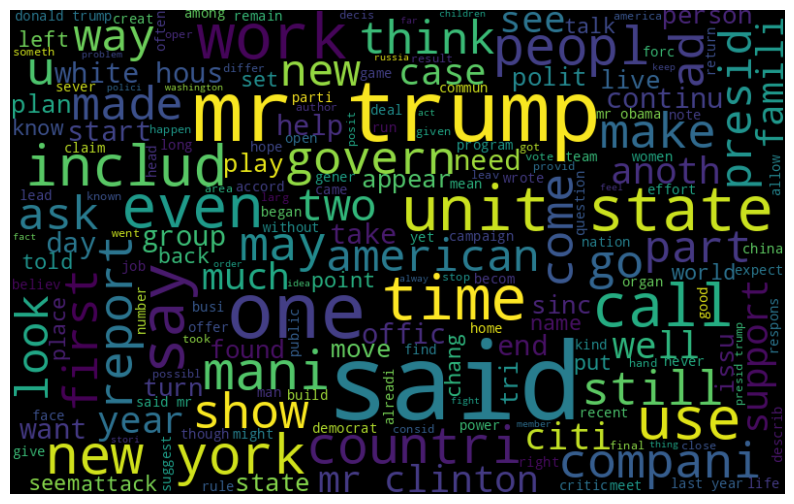

In [85]:
# real text cloud
real_text =' '.join([text for text in df['text'][df['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

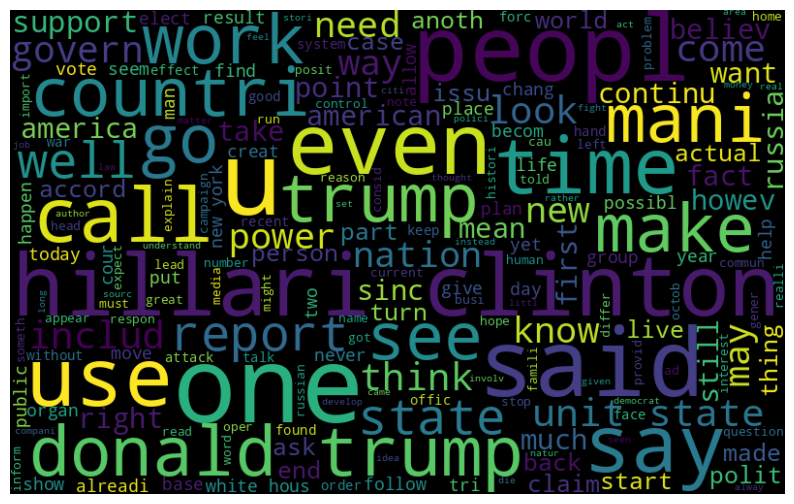

In [86]:
# fake text cloud
fake_text =' '.join([text for text in df['text'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake_text)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Combined

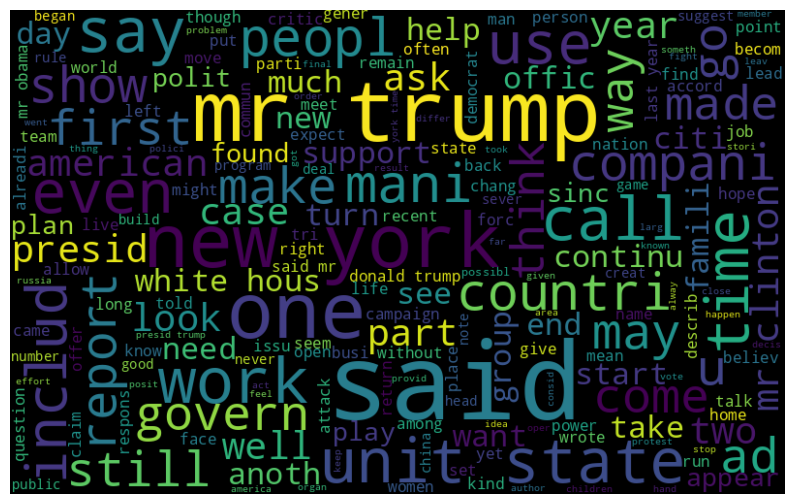

In [87]:
# real cloud
real =' '.join([text for text in df['merged'][df['label'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(real)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

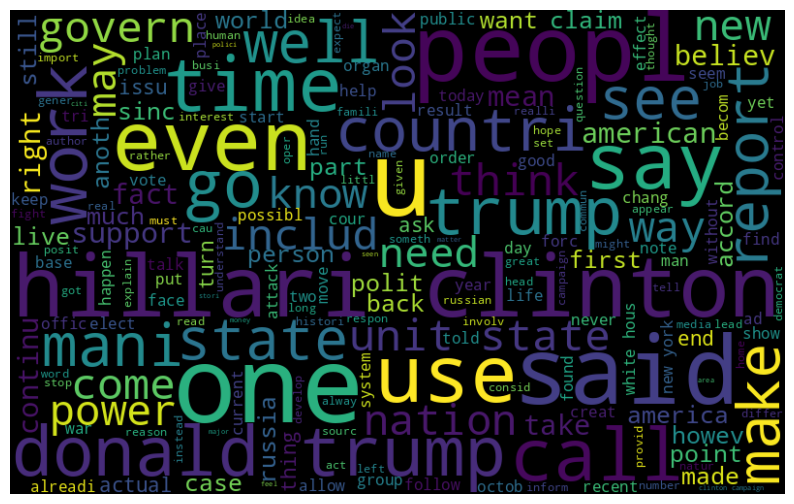

In [88]:
# fake cloud
fake =' '.join([text for text in df['merged'][df['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(fake)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Modelling

In [89]:
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [90]:
X = df['merged']
y = df['label']

In [91]:
X

0        hous dem aid even see comey letter jason chaff...
1        flynn hillari clinton big woman campu breitbar...
2        truth might get firedwhi truth might get fire ...
3        15 civilian kill singl us airstrik identifiedv...
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20198    rapper trump poster child white supremaci rapp...
20199    n f l playoff schedul matchup odd new york tim...
20200    maci said receiv takeov approach hudson bay ne...
20201    nato russia hold parallel exercis balkansnato ...
20202    keep f 35 aliv david swanson author activist j...
Name: merged, Length: 20203, dtype: object

In [93]:
vocabulary = ' '.join(X)
vocabulary = vocabulary.split()
print(len(vocabulary))
print(len(set(vocabulary)))
vocabulary = list(set(vocabulary))

voc_size = 150000

9048660
123450


One hot representation

In [94]:
one_hot_repr = [one_hot(sent, voc_size)for sent in X]
print(one_hot_repr)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Padding

In [95]:
sent_length = 4000

embedded_docs = pad_sequences(one_hot_repr,padding='post',maxlen=sent_length)
embedded_docs

array([[ 89213, 145836,  29856, ...,      0,      0,      0],
       [ 39005,  34988,  22783, ...,      0,      0,      0],
       [ 69052,  22973,  34343, ...,      0,      0,      0],
       ...,
       [142197, 124281,   2758, ...,      0,      0,      0],
       [108854, 126588,  24971, ...,      0,      0,      0],
       [ 57620, 117580,   9018, ...,      0,      0,      0]], dtype=int32)

In [96]:
X[0]

'hous dem aid even see comey letter jason chaffetz tweet ithous dem aid even see comey letter jason chaffetz tweet darrel lucu octob 30 2016 subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob 28 2016 cours know case comey actual say review email light u

In [97]:
embedded_docs[0]

array([ 89213, 145836,  29856, ...,      0,      0,      0], dtype=int32)

### LSTM

In [112]:
## Creating model
embedding_vector_features=400
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [113]:
X = np.array(embedded_docs)
y = np.array(y)

In [114]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
221/221 [==============================] - 72s 327ms/step - loss: 0.6932 - accuracy: 0.5058 - val_loss: 0.6932 - val_accuracy: 0.5166
Epoch 2/5
221/221 [==============================] - 69s 311ms/step - loss: 0.6931 - accuracy: 0.5107 - val_loss: 0.6930 - val_accuracy: 0.5166
Epoch 3/5
221/221 [==============================] - 69s 313ms/step - loss: 0.6928 - accuracy: 0.5143 - val_loss: 0.6927 - val_accuracy: 0.5169
Epoch 4/5
221/221 [==============================] - 70s 318ms/step - loss: 0.6927 - accuracy: 0.5024 - val_loss: 0.6928 - val_accuracy: 0.5164
Epoch 5/5
221/221 [==============================] - 66s 299ms/step - loss: 0.6921 - accuracy: 0.5151 - val_loss: 0.6928 - val_accuracy: 0.5166


In [117]:
y_pred=model.predict(X_test)

190/190 [==============================] - 11s 58ms/step


In [118]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

In [119]:
y_pred=np.where(y_pred > 0.6, 1,0)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68      3129
           1       1.00      0.00      0.00      2932

    accuracy                           0.52      6061
   macro avg       0.76      0.50      0.34      6061
weighted avg       0.75      0.52      0.35      6061



### Bi-directional LSTM

In [106]:
## Creating model
embedding_vector_features=400
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(100)))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [107]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
221/221 [==============================] - 135s 591ms/step - loss: 0.2092 - accuracy: 0.9166 - val_loss: 0.1138 - val_accuracy: 0.9602
Epoch 2/10
221/221 [==============================] - 140s 633ms/step - loss: 0.0488 - accuracy: 0.9849 - val_loss: 0.1261 - val_accuracy: 0.9571
Epoch 3/10
221/221 [==============================] - 133s 601ms/step - loss: 0.0187 - accuracy: 0.9947 - val_loss: 0.1454 - val_accuracy: 0.9503
Epoch 4/10
221/221 [==============================] - 125s 567ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.1902 - val_accuracy: 0.9523
Epoch 5/10
221/221 [==============================] - 129s 586ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 0.1794 - val_accuracy: 0.9536
Epoch 6/10
221/221 [==============================] - 127s 575ms/step - loss: 0.0032 - accuracy: 0.9990 - val_loss: 0.2328 - val_accuracy: 0.9472
Epoch 7/10
221/221 [==============================] - 127s 576ms/step - loss: 0.0057 - accuracy: 0.9984 - val_loss: 0.2089 -

In [108]:
y_pred=model.predict(X_test)

190/190 [==============================] - 22s 113ms/step


In [109]:
y_test

array([1, 1, 0, ..., 1, 1, 0])

In [110]:
y_pred=np.where(y_pred > 0.6, 1,0)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3129
           1       0.95      0.95      0.95      2932

    accuracy                           0.95      6061
   macro avg       0.95      0.95      0.95      6061
weighted avg       0.95      0.95      0.95      6061

